In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Uploading the dataset
data = pd.read_csv("players.csv")
data


,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,749,Matthew Whittingham,45,MID,Wolves,Whittingham,13,269,,272,...,250,0.0,428,0,0,0,0,0.0,680,0
765,750,Tawanda Chirewa,45,MID,Wolves,Chirewa,20,277,,280,...,258,0.0,441,0,0,0,0,0.0,693,0
766,751,Justin Hubner,40,DEF,Wolves,Hubner,151,217,,217,...,211,0.0,703,0,0,0,0,0.0,579,0
767,769,Owen Hesketh,45,MID,Wolves,Hesketh,11,257,,260,...,232,0.0,401,0,0,0,0,0.0,663,0


In [22]:
data['matches_played'] = (data['minutes '] / 90).round().astype(int)

data['age'] = np.random.randint(18, 36, size=len(data))

## Total Goal Efficiency by Position

In [23]:
position_data = data.groupby('position ').agg({
    'goals_scored ': 'sum',
    'matches_played': 'sum'
}).reset_index() 
position_data['goal_efficiency'] = (position_data['goals_scored '] / position_data['matches_played']) * 100

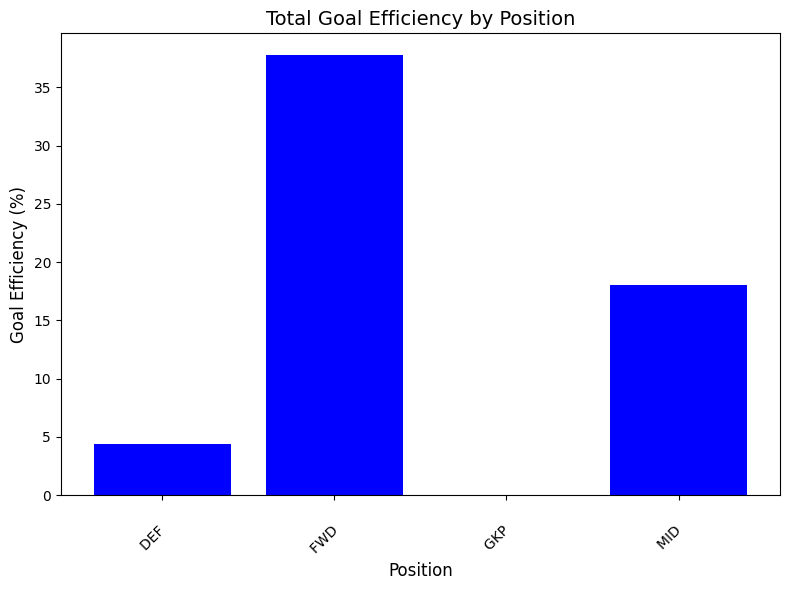

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(position_data['position '], position_data['goal_efficiency'], color='blue')
plt.title('Total Goal Efficiency by Position', fontsize=14)
plt.ylabel('Goal Efficiency (%)', fontsize=12)
plt.xlabel('Position', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

## Chart Calculating Player Age By Each Position

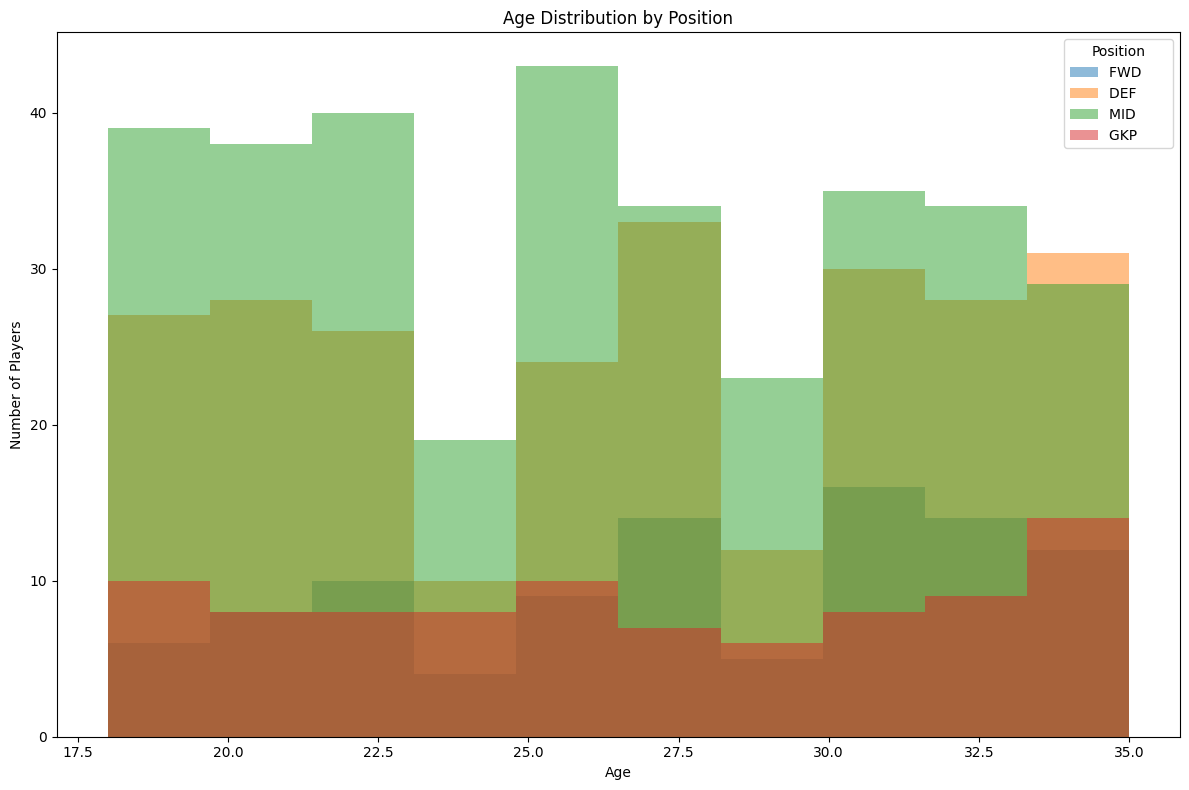

In [31]:

# Plot histograms for each position
positions = data['position '].unique()
plt.figure(figsize=(12, 8))

for position in positions:
    age_store = data[data['position '] == position]
    plt.hist(age_store['age'], bins=10, alpha=0.5, label=position)

plt.title('Age Distribution by Position')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.legend(title='Position')
plt.tight_layout()

# Show the plot
plt.show()


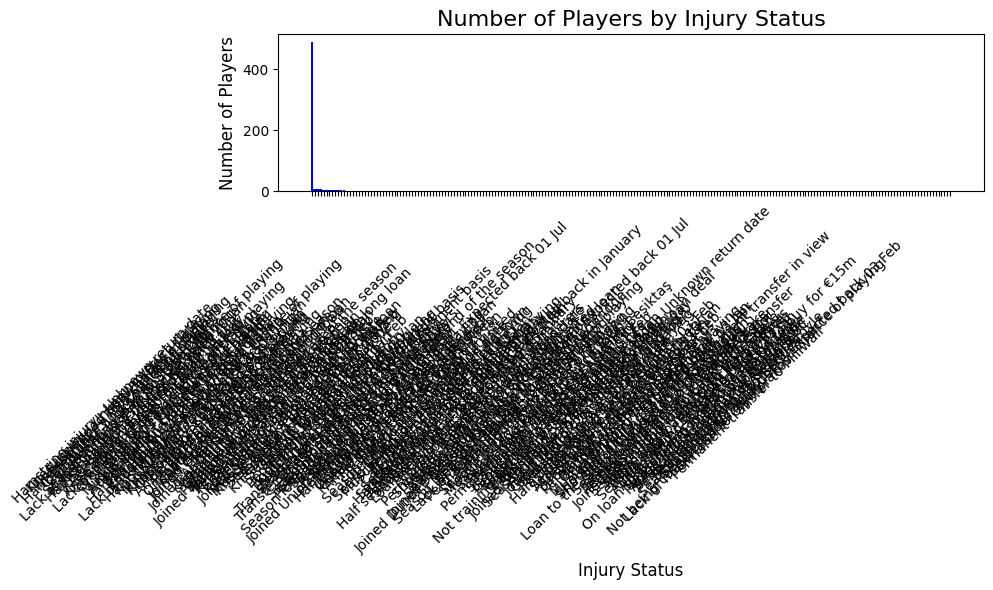

In [33]:


injury_counts = data['news                                                                  '].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(injury_counts.index, injury_counts.values, color='blue')

plt.title('Number of Players by Injury Status', fontsize=16)
plt.xlabel('Injury Status', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()